In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("customer_demographics_response_dataset.csv")

In [3]:
label_encoder = LabelEncoder()
for col in ['gender', 'employed', 'marital_status', 'responded']:
    data[col] = label_encoder.fit_transform(data[col])

In [4]:
X = data[['age', 'gender', 'annual_income', 'credit_score',
          'employed', 'marital_status', 'no_of_children']]
y = data['responded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse')
}

In [8]:
results = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)

In [9]:
results_df = pd.DataFrame(results)
print(results_df)

               Model       MAE       MSE      RMSE        R2
0      Decision Tree  0.150000  0.150000  0.387298  0.386189
1      Random Forest  0.247500  0.108710  0.329712  0.555151
2  Gradient Boosting  0.287778  0.144788  0.380510  0.407516
3            XGBoost  0.266415  0.150206  0.387564  0.385347


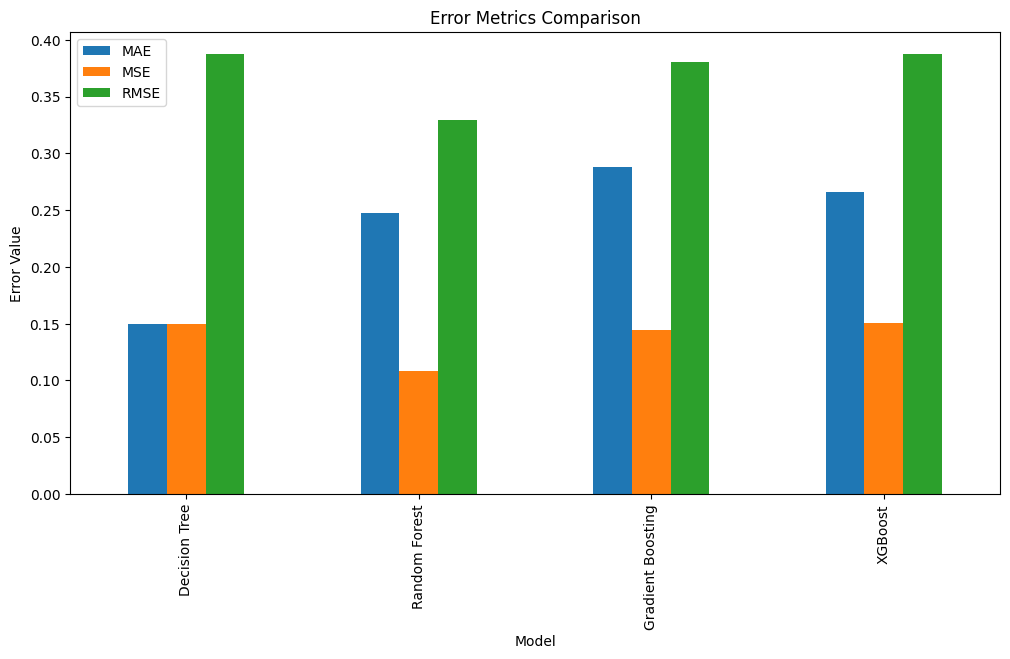

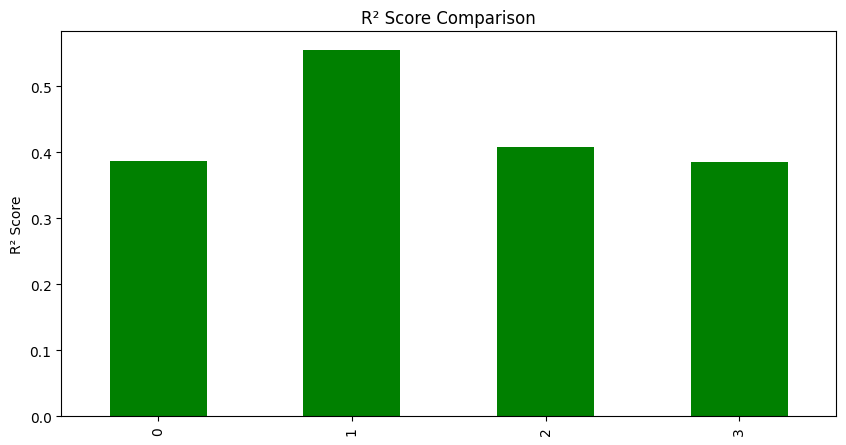

In [10]:
results_df.set_index('Model')[['MAE', 'MSE', 'RMSE']].plot(kind='bar', figsize=(12, 6))
plt.title("Error Metrics Comparison")
plt.ylabel("Error Value")
plt.show()

results_df['R2'].plot(kind='bar', figsize=(10, 5), color='green')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.show()
